In [5]:
from osgeo import gdal
import matplotlib.pyplot as plt

from meteocre.fetchmrms.probsevere import ProbSevereProductCollection
from meteocre.fetchmrms.probsevere.plots import panel_plot_for_track

In [6]:
path = '/data/storm_router/case_studies/Andover_Tornado_042922/MRMS/ProbSevere/'

In [14]:
# Read in MRMS ProbSevere data
col = ProbSevereProductCollection.from_directory(path)

# Compute feature tracks
tracks = col.compute_feature_tracks()

# For each track, compute max probtor [%]
track_max_probtor = {
    track_id: max(track.probtor_trend)
    for track_id, track in tracks.items() if len(track.probtor_trend) > 3
}

# Find ID of track that has the max probtor value
max_probtor_track_id = max(track_max_probtor,
                           key=track_max_probtor.get)     # type: ignore

print(max_probtor_track_id)

13157


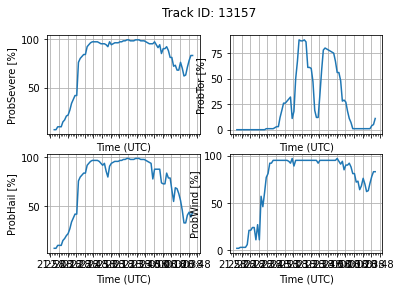

In [15]:
%matplotlib inline
panel_plot_for_track(tracks[max_probtor_track_id])
plt.show()